In [ ]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Gasoline RBOB Futures Historical Data.csv to Gasoline RBOB Futures Historical Data.csv
Saving GDP.csv to GDP.csv
Saving Inflation_rate.csv to Inflation_rate.csv
Saving Oil data.csv to Oil data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Oil data.csv']))
df1 = df[['Dates','PX_VOLUME','PX_CLOSE_1D','CHG_PCT_1D']]
df1['Dates'] = pd.to_datetime(df1['Dates'])
start_date = '2005-11-17'
end_date = '2022-12-31'
df1 = df1.loc[(df1['Dates'] >= start_date) & (df1['Dates'] < end_date)]

<ipython-input-2-06bf8167b92b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dates'] = pd.to_datetime(df1['Dates'])


In [ ]:
oil = df1.sort_values('Dates')
oil.columns.values[0] = "Date"
oil.columns.values[1] = "Volume"
oil.columns.values[2] = "Price"
oil.columns.values[3] = "Oil Price Change%"
oil.columns = oil.columns.str.strip()

In [ ]:
#Average Price for last 30 days
sma = 30
oil['sma'] = oil['Price'].rolling(sma).mean()
oil = oil.dropna()

In [ ]:
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28627 sha256=b76eeee373527a40837f1e42053df2ef9e6bcb4cd1158cefa8b4e567520c21bb
  Stored in directory: /root/.cache/pip/wheels/32/a3/b6/b5b33187f2d42f095fecc236b957b46173fa09e78a106e309f
Successfully built yahoofinancials


In [ ]:
#commodity index
SPGSCI = yf.download('^NDX', start = "2006-01-01",end = "2022-12-31")
SPGSCI = SPGSCI.reset_index()

[*********************100%***********************]  1 of 1 completed


In [ ]:
CommIndex_Price = SPGSCI[['Date','Adj Close']]
CommIndex_Price.columns.values[1] = "SPGSCI Price"

In [ ]:
total = pd.merge(oil,CommIndex_Price,how = 'inner',on = 'Date')
total.tail()

,Date,Volume,Price,Oil Price Change%,sma,SPGSCI Price
4029,2022-12-23,237711.0,77.49,2.67,78.553000,10985.450195
4030,2022-12-27,199601.0,79.56,-0.04,78.322667,10822.509766
4031,2022-12-28,207717.0,79.53,-0.72,78.008333,10679.339844
4032,2022-12-29,199858.0,78.96,-0.71,77.778000,10951.049805
4033,2022-12-30,205909.0,78.40,2.37,77.494000,10939.759766


In [ ]:
#Gasoline Price
gasoline = pd.read_csv(io.BytesIO(uploaded['Gasoline RBOB Futures Historical Data.csv']))

In [ ]:
gas = gasoline
gas = gas[['Date','Price','Change %']]
gas['Date'] = pd.to_datetime(gas['Date'])
start_date = '2006-01-01'
gas = gas.loc[(gas['Date'] >= start_date) & (gas['Date'] < end_date)]
gas = gas.sort_values('Date')
gas.columns.values[1] = "Gas Price"
gas.columns.values[2] = "Gas Price Change %"
gas.columns = gas.columns.str.strip()
gas.head()

<ipython-input-10-895c67903b09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas['Date'] = pd.to_datetime(gas['Date'])


,Date,Gas Price,Gas Price Change %
4717,2006-01-03,1.7862,2.66%
4716,2006-01-04,1.8245,2.14%
4715,2006-01-05,1.8170,-0.41%
4714,2006-01-06,1.8455,1.57%
4713,2006-01-09,1.7975,-2.60%


In [ ]:
total = pd.merge(total,gas,how = 'inner',on = 'Date')

In [ ]:
total

,Date,Volume,Price,Oil Price Change%,sma,SPGSCI Price,Gas Price,Gas Price Change %
0,2006-01-03,130635.0,61.04,3.44,58.839667,1679.930054,1.7862,2.66%
1,2006-01-04,105194.0,63.14,0.44,59.015000,1695.829956,1.8245,2.14%
2,2006-01-05,104035.0,63.42,-0.99,59.251000,1705.290039,1.8170,-0.41%
3,2006-01-06,110763.0,62.79,2.26,59.472667,1734.989990,1.8455,1.57%
4,2006-01-09,115558.0,64.21,-1.11,59.689667,1741.900024,1.7975,-2.60%
...,...,...,...,...,...,...,...,...
4027,2022-12-23,237711.0,77.49,2.67,78.553000,10985.450195,2.3915,5.83%
4028,2022-12-27,199601.0,79.56,-0.04,78.322667,10822.509766,2.3683,-2.26%
4029,2022-12-28,207717.0,79.53,-0.72,78.008333,10679.339844,2.3629,-0.23%
4030,2022-12-29,199858.0,78.96,-0.71,77.778000,10951.049805,2.3707,0.33%


In [ ]:
gdp_others = pd.read_csv(io.BytesIO(uploaded['GDP.csv']))

In [ ]:
gdp_others

,DATE,GDP,Latin America,Europe,Africa,Middle East,Asia Pacific,Total Intl.,Canada,U.S.,Total World,Inflation Rate,Unnamed: 12,Unnamed: 13
0,1983-01-01,3473.413,486.0,220.0,193.0,229.0,288.0,1416.0,241.0,2622.0,4279.0,4.7,NaN,NaN
1,1983-02-01,3473.413,476.0,211.0,179.0,229.0,286.0,1381.0,233.0,2192.0,3806.0,4.7,NaN,NaN
2,1983-03-01,3473.413,460.0,196.0,184.0,198.0,284.0,1322.0,226.0,2003.0,3551.0,4.7,NaN,NaN
3,1983-04-01,3578.848,455.0,182.0,167.0,190.0,285.0,1279.0,78.0,1846.0,3203.0,4.3,NaN,NaN
4,1983-05-01,3578.848,451.0,179.0,154.0,202.0,287.0,1273.0,76.0,1926.0,3275.0,3.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2022-12-01,26137.992,173.0,115.0,92.0,323.0,197.0,900.0,155.0,779.0,1834.0,5.7,NaN,NaN
480,2023-01-01,26465.865,170.0,117.0,92.0,318.0,204.0,901.0,226.0,772.0,1899.0,6.4,NaN,NaN
481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gdp_filtered = gdp_others.iloc[:-3, :-2]
# gdp_filtered["DATE"] = pd.to_datetime(gdp_filtered["DATE"]).dt.strftime('%Y-%m-%d')
start_date = '2006-01-01'
end_date = '2023-01-02'
gdp_filtered = gdp_filtered.loc[(gdp_filtered['DATE'] >= start_date) & (gdp_filtered['DATE'] < end_date)]
gdp_filtered = gdp_filtered.sort_values('DATE')

In [ ]:
gdp_filtered

,DATE,GDP,Latin America,Europe,Africa,Middle East,Asia Pacific,Total Intl.,Canada,U.S.,Total World,Inflation Rate
276,2006-01-01,13599.160,323.0,81.0,47.0,210.0,244.0,905.0,660.0,1473.0,3038.0,2.1
277,2006-02-01,13599.160,309.0,85.0,49.0,212.0,230.0,885.0,715.0,1533.0,3133.0,2.1
278,2006-03-01,13599.160,306.0,80.0,58.0,221.0,233.0,898.0,620.0,1551.0,3069.0,2.1
279,2006-04-01,13753.424,327.0,81.0,56.0,226.0,222.0,912.0,198.0,1597.0,2707.0,2.3
280,2006-05-01,13753.424,333.0,86.0,50.0,229.0,222.0,920.0,240.0,1635.0,2795.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-09-01,25723.941,180.0,106.0,80.0,308.0,205.0,879.0,211.0,763.0,1853.0,6.6
477,2022-10-01,26137.992,188.0,107.0,84.0,326.0,206.0,911.0,214.0,768.0,1893.0,6.3
478,2022-11-01,26137.992,185.0,102.0,91.0,330.0,202.0,910.0,201.0,779.0,1890.0,6.0
479,2022-12-01,26137.992,173.0,115.0,92.0,323.0,197.0,900.0,155.0,779.0,1834.0,5.7


In [ ]:
gdp_filtered['DATE'] = pd.to_datetime(gdp_filtered['DATE'])
gdp_filtered.set_index('DATE', inplace=True)

total['Date'] = pd.to_datetime(total['Date'])
total.set_index('Date', inplace=True)

In [ ]:
daily_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
daily_df = pd.DataFrame(index=daily_date_range)

In [ ]:
resampled_monthly_df = gdp_filtered.resample('D').asfreq()
interpolated_df = resampled_monthly_df.interpolate(method='linear')


In [ ]:
merged_df = pd.merge(total, interpolated_df, left_index=True, right_index=True, how='inner')
merged_df

,Volume,Price,Oil Price Change%,sma,SPGSCI Price,Gas Price,Gas Price Change %,GDP,Latin America,Europe,Africa,Middle East,Asia Pacific,Total Intl.,Canada,U.S.,Total World,Inflation Rate
2006-01-03,130635.0,61.04,3.44,58.839667,1679.930054,1.7862,2.66%,13599.160000,322.096774,81.258065,47.129032,210.129032,243.096774,903.709677,663.548387,1476.870968,3044.129032,2.100000
2006-01-04,105194.0,63.14,0.44,59.015000,1695.829956,1.8245,2.14%,13599.160000,321.645161,81.387097,47.193548,210.193548,242.645161,903.064516,665.322581,1478.806452,3047.193548,2.100000
2006-01-05,104035.0,63.42,-0.99,59.251000,1705.290039,1.8170,-0.41%,13599.160000,321.193548,81.516129,47.258065,210.258065,242.193548,902.419355,667.096774,1480.741935,3050.258065,2.100000
2006-01-06,110763.0,62.79,2.26,59.472667,1734.989990,1.8455,1.57%,13599.160000,320.741935,81.645161,47.322581,210.322581,241.741935,901.774194,668.870968,1482.677419,3053.322581,2.100000
2006-01-09,115558.0,64.21,-1.11,59.689667,1741.900024,1.7975,-2.60%,13599.160000,319.387097,82.032258,47.516129,210.516129,240.387097,899.838710,674.193548,1488.483871,3062.516129,2.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,237711.0,77.49,2.67,78.553000,10985.450195,2.3915,5.83%,26370.676065,170.870968,116.419355,92.000000,319.451613,201.967742,900.709677,205.387097,774.032258,1880.129032,6.196774
2022-12-27,199601.0,79.56,-0.04,78.322667,10822.509766,2.3683,-2.26%,26412.982258,170.483871,116.677419,92.000000,318.806452,202.870968,900.838710,214.548387,773.129032,1888.516129,6.287097
2022-12-28,207717.0,79.53,-0.72,78.008333,10679.339844,2.3629,-0.23%,26423.558806,170.387097,116.741935,92.000000,318.645161,203.096774,900.870968,216.838710,772.903226,1890.612903,6.309677
2022-12-29,199858.0,78.96,-0.71,77.778000,10951.049805,2.3707,0.33%,26434.135355,170.290323,116.806452,92.000000,318.483871,203.322581,900.903226,219.129032,772.677419,1892.709677,6.332258


In [ ]:
merged_df.columns.values

array(['Volume', 'Price', 'Oil Price Change%', 'sma', 'SPGSCI Price',
       'Gas Price', 'Gas Price Change %', 'GDP', 'Latin America',
       'Europe', 'Africa', 'Middle East', 'Asia Pacific', 'Total Intl.',
       'Canada', 'U.S.', 'Total World', 'Inflation Rate'], dtype=object)

In [ ]:
merged_df = merged_df.drop([
    # 'Gas Price_x',
                # 'Gas Price_y',
                # 'Gas Price Change %_x',
                # 'Gas Price Change %_y',
                'Oil Price Change%',
                'Gas Price Change %'
                ], axis = 1)

In [ ]:
merged_df['oil_returns'] = merged_df['Price'].pct_change()
merged_df['oil_returns'] = merged_df['oil_returns'].fillna(0.034404)

merged_df['gas_returns'] = merged_df['Gas Price'].pct_change()
merged_df['gas_returns'] = merged_df['gas_returns'].fillna(0.021442)

merged_df['SPGSCI_returns'] = merged_df['SPGSCI Price'].pct_change()
merged_df['SPGSCI_returns'] = merged_df['SPGSCI_returns'].fillna(0.009465)

merged_df.head()

,Volume,Price,sma,SPGSCI Price,Gas Price,GDP,Latin America,Europe,Africa,Middle East,Asia Pacific,Total Intl.,Canada,U.S.,Total World,Inflation Rate,oil_returns,gas_returns,SPGSCI_returns
2006-01-03,130635.0,61.04,58.839667,1679.930054,1.7862,13599.16,322.096774,81.258065,47.129032,210.129032,243.096774,903.709677,663.548387,1476.870968,3044.129032,2.1,0.034404,0.021442,0.009465
2006-01-04,105194.0,63.14,59.015000,1695.829956,1.8245,13599.16,321.645161,81.387097,47.193548,210.193548,242.645161,903.064516,665.322581,1478.806452,3047.193548,2.1,0.034404,0.021442,0.009465
2006-01-05,104035.0,63.42,59.251000,1705.290039,1.8170,13599.16,321.193548,81.516129,47.258065,210.258065,242.193548,902.419355,667.096774,1480.741935,3050.258065,2.1,0.004435,-0.004111,0.005578
2006-01-06,110763.0,62.79,59.472667,1734.989990,1.8455,13599.16,320.741935,81.645161,47.322581,210.322581,241.741935,901.774194,668.870968,1482.677419,3053.322581,2.1,-0.009934,0.015685,0.017416
2006-01-09,115558.0,64.21,59.689667,1741.900024,1.7975,13599.16,319.387097,82.032258,47.516129,210.516129,240.387097,899.838710,674.193548,1488.483871,3062.516129,2.1,0.022615,-0.026009,0.003983


In [ ]:
import pandas_datareader.data as web

# set the start and end dates
start_date = '2006-01-03'
end_date = '2022-12-31'

# fetch daily data for the volatility index (VIX)
vix_df = yf.download('^VIX', start_date, end_date)
vix_df = vix_df[['Adj Close']]
vix_df = vix_df.rename(columns={'Adj Close': 'VIX'})

# fetch daily data for the stock market index (S&P 500)
sp500_df = yf.download('^GSPC', start_date, end_date)
sp500_df = sp500_df[['Adj Close']]
sp500_df = sp500_df.rename(columns={'Adj Close': 'S&P500'})

# fetch daily data for the USD exchange rate against Euro
usd_sar_df  = web.DataReader('DEXCAUS', 'fred', start_date, end_date)

# fetch daily data for the 10-year sovereign bond yield of the US
us_bond_df = web.DataReader('DGS10', 'fred', start_date, end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
merged_df

,Volume,Price,sma,SPGSCI Price,Gas Price,GDP,Latin America,Europe,Africa,Middle East,Asia Pacific,Total Intl.,Canada,U.S.,Total World,Inflation Rate,oil_returns,gas_returns,SPGSCI_returns
2006-01-03,130635.0,61.04,58.839667,1679.930054,1.7862,13599.160000,322.096774,81.258065,47.129032,210.129032,243.096774,903.709677,663.548387,1476.870968,3044.129032,2.100000,0.034404,0.021442,0.009465
2006-01-04,105194.0,63.14,59.015000,1695.829956,1.8245,13599.160000,321.645161,81.387097,47.193548,210.193548,242.645161,903.064516,665.322581,1478.806452,3047.193548,2.100000,0.034404,0.021442,0.009465
2006-01-05,104035.0,63.42,59.251000,1705.290039,1.8170,13599.160000,321.193548,81.516129,47.258065,210.258065,242.193548,902.419355,667.096774,1480.741935,3050.258065,2.100000,0.004435,-0.004111,0.005578
2006-01-06,110763.0,62.79,59.472667,1734.989990,1.8455,13599.160000,320.741935,81.645161,47.322581,210.322581,241.741935,901.774194,668.870968,1482.677419,3053.322581,2.100000,-0.009934,0.015685,0.017416
2006-01-09,115558.0,64.21,59.689667,1741.900024,1.7975,13599.160000,319.387097,82.032258,47.516129,210.516129,240.387097,899.838710,674.193548,1488.483871,3062.516129,2.100000,0.022615,-0.026009,0.003983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,237711.0,77.49,78.553000,10985.450195,2.3915,26370.676065,170.870968,116.419355,92.000000,319.451613,201.967742,900.709677,205.387097,774.032258,1880.129032,6.196774,-0.010218,0.058326,0.002675
2022-12-27,199601.0,79.56,78.322667,10822.509766,2.3683,26412.982258,170.483871,116.677419,92.000000,318.806452,202.870968,900.838710,214.548387,773.129032,1888.516129,6.287097,0.026713,-0.009701,-0.014832
2022-12-28,207717.0,79.53,78.008333,10679.339844,2.3629,26423.558806,170.387097,116.741935,92.000000,318.645161,203.096774,900.870968,216.838710,772.903226,1890.612903,6.309677,-0.000377,-0.002280,-0.013229
2022-12-29,199858.0,78.96,77.778000,10951.049805,2.3707,26434.135355,170.290323,116.806452,92.000000,318.483871,203.322581,900.903226,219.129032,772.677419,1892.709677,6.332258,-0.007167,0.003301,0.025443


In [ ]:
df = pd.merge(vix_df, sp500_df, how = 'inner',on = 'Date')
merged_df = pd.merge(merged_df, usd_sar_df, left_index=True, right_index=True, how='inner')
merged_df = pd.merge(merged_df, us_bond_df, left_index=True, right_index=True, how='inner')
merged_df = pd.merge(merged_df, df, left_index=True, right_index=True, how='inner')
merged_df.columns.values

array(['Volume', 'Price', 'sma', 'SPGSCI Price', 'Gas Price', 'GDP',
       'Latin America', 'Europe', 'Africa', 'Middle East', 'Asia Pacific',
       'Total Intl.', 'Canada', 'U.S.', 'Total World', 'Inflation Rate',
       'oil_returns', 'gas_returns', 'SPGSCI_returns', 'DEXCAUS', 'DGS10',
       'VIX', 'S&P500'], dtype=object)

In [ ]:
merged_df = merged_df.fillna(method='bfill')

merged_df.isna().sum().sum()

0

In [ ]:
corr_matrix = merged_df.corr()
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(corr_matrix)

                  Volume     Price       sma  SPGSCI Price  Gas Price  \
Volume          1.000000 -0.356029 -0.351705      0.269272  -0.359917   
Price          -0.356029  1.000000  0.973623     -0.184491   0.934887   
sma            -0.351705  0.973623  1.000000     -0.200522   0.914310   
SPGSCI Price    0.269272 -0.184491 -0.200522      1.000000  -0.270646   
Gas Price      -0.359917  0.934887  0.914310     -0.270646   1.000000   
GDP             0.367989 -0.185270 -0.187967      0.940351  -0.246501   
Latin America  -0.451285  0.571964  0.596501     -0.815776   0.632717   
Europe          0.069241  0.155791  0.193940      0.083978   0.169306   
Africa          0.179943  0.146527  0.179723      0.004335   0.197237   
Middle East     0.425732 -0.207598 -0.173957      0.083266  -0.111413   
Asia Pacific   -0.299295  0.537962  0.559983     -0.725797   0.524548   
Total Intl.    -0.146775  0.431125  0.474569     -0.615793   0.516106   
Canada         -0.376813  0.429595  0.462671     -0

---------------------------------End of Preprocessing---------------------------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(merged_df, test_size=0.2, shuffle=False)

# Select the target feature
target_feature = 'Price'

In [ ]:
# Split the training and testing data into features and target variable
X_train = train_data.drop(target_feature, axis=1)
y_train = train_data[target_feature]

X_test = test_data.drop(target_feature, axis=1)
y_test = test_data[target_feature]

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Gaussian process regression model
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)
gpr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         random_state=42)

In [ ]:
# XGBoost model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
#Bayesian ridge regression model
bayes = BayesianRidge()
bayes.fit(X_train, y_train)

BayesianRidge()

In [ ]:
# Predictions
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)
gpr_preds = gpr.predict(X_test)
bayes_preds = bayes.predict(X_test)

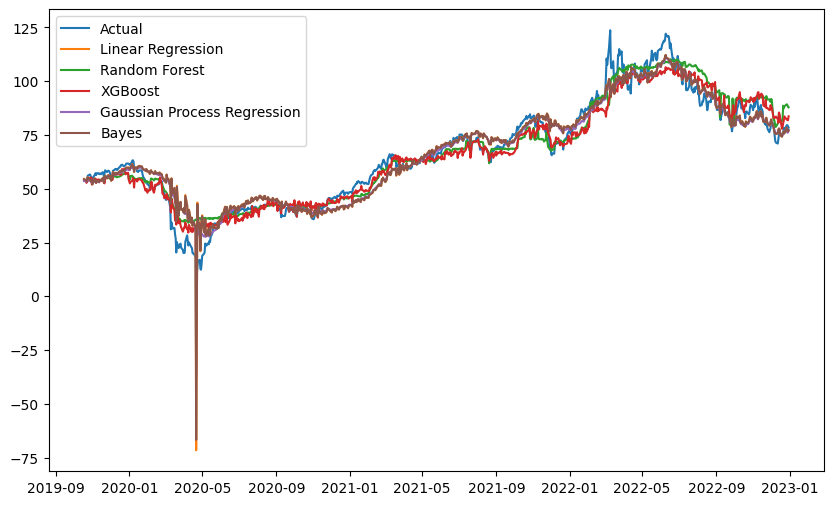

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, lr_preds, label='Linear Regression')
plt.plot(y_test.index, rf_preds, label='Random Forest')
plt.plot(y_test.index, xgb_preds, label='XGBoost')
plt.plot(y_test.index, gpr_preds, label='Gaussian Process Regression')
plt.plot(y_test.index, bayes_preds, label='Bayes')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and RMSE for each model
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_preds)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)

xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_preds)

gpr_mae = mean_absolute_error(y_test, gpr_preds)
gpr_mse = mean_squared_error(y_test, gpr_preds)
gpr_rmse = np.sqrt(gpr_mse)
gpr_r2 = r2_score(y_test, gpr_preds)

bayes_mae = mean_absolute_error(y_test, bayes_preds)
bayes_mse = mean_squared_error(y_test, bayes_preds)
bayes_rmse = np.sqrt(bayes_mse)
bayes_r2 = r2_score(y_test, bayes_preds)


In [ ]:
# Print the results
print(f"Linear Regression: MAE={lr_mae:.2f}, MSE={lr_mse:.2f}, RMSE={lr_rmse:.2f}, R^2={lr_r2:.2f}")
print(f"Random Forest: MAE={rf_mae:.2f}, MSE={rf_mse:.2f}, RMSE={rf_rmse:.2f}, R^2={rf_r2:.2f}")
print(f"XGBoost: MAE={xgb_mae:.2f}, MSE={xgb_mse:.2f}, RMSE={xgb_rmse:.2f}, R^2={xgb_r2:.2f}")
print(f"Gaussian Process Regression: MAE={gpr_mae:.2f}, MSE={gpr_mse:.2f}, RMSE={gpr_rmse:.2f}, R^2={gpr_r2:.2f}")
print(f"Bayesian Ridge Regression: MAE={bayes_mae:.2f}, MSE={bayes_mse:.2f}, RMSE={bayes_rmse:.2f}, R^2={bayes_r2:.2f}")


Linear Regression: MAE=4.32, MSE=36.96, RMSE=6.08, R^2=0.94
Random Forest: MAE=4.68, MSE=45.85, RMSE=6.77, R^2=0.92
XGBoost: MAE=4.49, MSE=40.48, RMSE=6.36, R^2=0.93
Gaussian Process Regression: MAE=4.32, MSE=36.13, RMSE=6.01, R^2=0.94
Bayesian Ridge Regression: MAE=4.31, MSE=36.39, RMSE=6.03, R^2=0.94
